本笔记本对应知乎问题 [蜜蜂在蜂巢随机游走一百步后离原点的距离期望是多少?](https://www.zhihu.com/question/266611177)

In [1]:
import numpy as np

In [2]:
A168605 =[1,2,8,30,104,342,1088,3390,10424,31782,96368,
 291150,877544,2640822,7938848,23849310,71613464,
 214971462,645176528,1936053870,5809210184,
 17429727702,52293377408,156888520830,470682339704,
 1412080573542]

A168605 = np.array(A168605)

In [3]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            23G         10G        8.6G         42M        4.0G         11G
Swap:           46G        9.1G         37G


In [25]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            23G         18G        5.0G         25M        307M        4.5G
Swap:           46G         18G         28G


In [2]:
###### 格点距离的精确精确解
N = 200
# arr = np.zeros((N//2,N),dtype ='float32')
arr = np.zeros((N//2,N),dtype =int)
arr[0,N//2]=1
# print arr
for i in range(1,N//2):
    last = arr[i-1,:]
    fir = [1]*3
    arr[i,:] = np.convolve(last,fir,mode='same')
#     arr[i,:] = arr[i,:]/arr[i,:].sum() ###可以考虑归一化防止underflow
    

x = abs(np.arange(0,N) - N//2)[None,:] ### grid x
# print arr[0,np.where(x == 0)[1]]
SUM = np.sum(x*arr,axis = 1)
print ','.join(str(x) for x in SUM.tolist()[:20])


0,2,8,30,104,350,1152,3738,12000,38214,120920,380666,1193304,3727490,11608352,36057510,111747744,345636486,1067179320,3289843578


In [5]:
%%time
#### 仿射坐标系上的蒙特卡罗采样
import numpy as np
import matplotlib.pyplot as plt

if 'tvec' in locals():
    del tvec ##清理内存
    
### 小心内存溢出
sample_size = int(1E5)
# sample_size = int(3E6)
batch_num = 1 ###确保能整除
T = 151
t = 100
delta = np.array([(0,1),(1,1),(1,0),(0,-1),(-1,-1),(-1,0)])

lst = []
for i in range(batch_num):
    if 'Tvec' in locals():
        del Tvec,dvec ##清理内存
    idx = np.random.choice(6,size=(sample_size//batch_num,T))
    dvec = delta[idx]
    Tvec = np.cumsum(dvec,axis = 1)
    if batch_num==1:
        break
#         return Tvec
    tvec = Tvec[:,t]
    lst += [tvec]
if lst:
    tvec = np.concatenate(lst,axis = 0,)
del lst

CPU times: user 14.1 s, sys: 29.4 s, total: 43.5 s
Wall time: 55.8 s


In [32]:
del Tvec,lst

t=100 , N=3.000000E+06


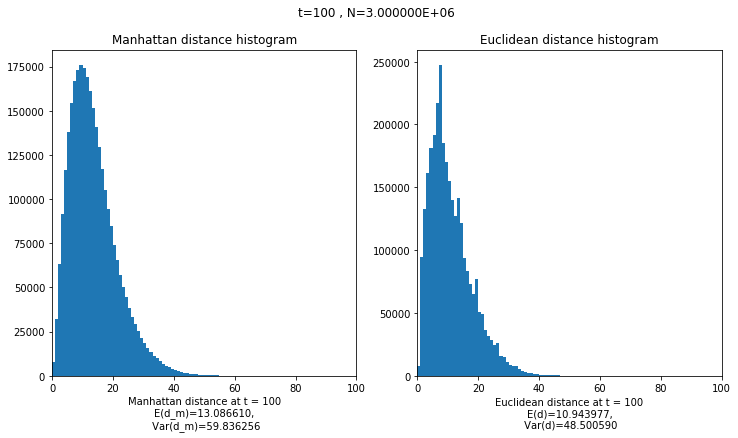

In [6]:
#### 数据可视化
# t = 100

# def histo_t(t,sample_size = sample_size,Tvec = Tvec):
def histo_t(t,tvec = None,Tvec = None):
    if tvec is None:
        tvec = Tvec[:,t]
    sample_size = len(tvec)
    bins = np.arange(t)
    stl = "t=%d , N=%E"%(t,sample_size)
    print stl
    plt.figure(figsize = [12,6])
    plt.subplot(121)
    hex_dist = np.sum(abs(tvec),axis = 1)
    plt.hist(hex_dist,bins = bins)
    plt.xlim(0,t)
    plt.title("Manhattan distance histogram")
    stat = "E(d_m)=%f,\n Var(d_m)=%f"%(hex_dist.mean(),hex_dist.var())
    plt.xlabel('Manhattan distance at t = %d\n'%t+stat)
    # plt.show()
    # print "E(d_m)=",hex_dist.mean()

    plt.subplot(122)

    euc_dist = np.sqrt(np.sum(tvec**2,axis = 1) + tvec[:,0]*tvec[:,1])
    plt.hist(euc_dist,bins = bins)
    plt.xlim(0,t)
    plt.title("Euclidean distance histogram")
    stat = "E(d)=%f,\n Var(d)=%f"%(euc_dist.mean(),euc_dist.var())

    plt.xlabel('Euclidean distance at t = %d\n'%t+stat)

    plt.suptitle(stl)
    plt.show()
    return plt.gcf()
t = 100
# tvec=  Tvec[:,t]
histo_t(t,Tvec = Tvec);

t=50 , N=3.000000E+06


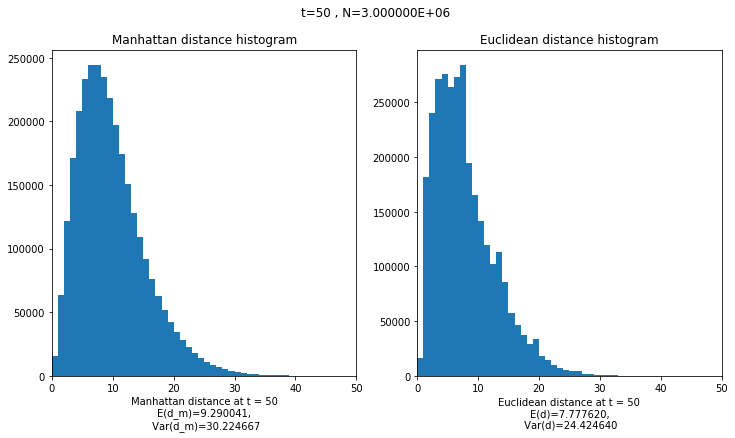

In [7]:
histo_t(50,Tvec = Tvec);

In [66]:
d_m = abs(Tvec).sum(axis = 2)

In [9]:
d_m_Var = abs(Tvec).sum(axis = 2).var(axis=0)

In [67]:
d_m_sq_mean = np.square(d_m).mean(axis=0)

In [80]:

ts = np.arange(len(d_m_Var))
plt.plot(np.sqrt(d_m_sq_mean-d_m_Var))
coef = np.polyfit(ts,d_m_sq_mean,1)
print coef
coef[0] = coef[0] - 4./3
print coef
# plt.vlines(100,0,16)

# ?plt.vlines
# plt.show()

[2.29297433 1.95984661]
[0.959641   1.95984661]


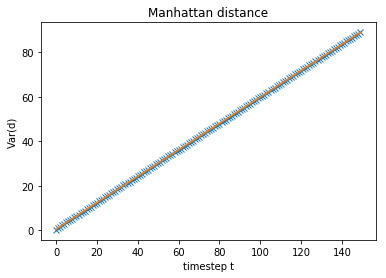

[0.59329026 0.57671933]
1.0899473358263276
[ 0.74004308 -0.57671933]


In [61]:
dist_name = 'Manhattan distance'
plt.plot(d_m_Var,'x')
plt.title(dist_name)
plt.ylabel('Var(d)')
plt.xlabel('timestep t')
# np.corrcoef()
ts = np.arange(len(d_m_Var))
z = np.polyfit(ts, d_m_Var, 1)
# print np.corrcoef([ts,d_m_Var])
plt.plot(ts,ts*z[0] + z[1])
plt.show()

# print z
# print 1/z[1]-np.pi
print z
print (5/3. - z[1])
z = -z
z[0]= z[0]+4/3.
print z 

$$
E({d^t_{l1}}^2)=\frac{4t}{3}
$$

In [64]:
100*z[0]+z[1]

73.42758821958601

In [65]:
print z
f=np.poly1d(z)
f(100)**0.5

[ 0.74004308 -0.57671933]


73.42758821958601

In [289]:
#### 一个不太成熟的近似

def ms():

    a, b, c, d, n = 0, 1, 1, -1, 1

    #yield 1

    while True:

        if 1:
            yield -b + (-1)**n*d
        n += 1

        a, b = b, (3*(n-1)*n*a+(2*n-1)*n*b)/((n+1)*(n-1))

        c, d = d, (3*(n-1)*c-(2*n-1)*d)/n
#         if n >=0:

A005043 = ms()

print([A005043.next() for _ in range(32)])

A005043 = ms()
lst = []
b = 1
for i in range(100):
    y = 3.**(i+1) /2. / b
    print y
    a = A005043.next()
    b = 3*b-2*a
    
#     print (3.**i)
#    print x/3.**i
#    y = 3/2. * 1 / (1+x/3.**i)
#     print a,b

[0, 1, 1, 3, 6, 15, 36, 91, 232, 603, 1585, 4213, 11298, 30537, 83097, 227475, 625992, 1730787, 4805595, 13393689, 37458330, 105089229, 295673994, 834086421, 2358641376, 6684761125, 18985057351, 54022715451, 154000562758, 439742222071, 1257643249140, 3602118427251]
1.5
1.5
1.92857142857
2.13157894737
2.38235294118
2.58510638298
2.78244274809
2.96341463415
3.135234151
3.29772143416
3.45275406385
3.60108552765
3.74357920739
3.88084991407
4.01344003464
4.14179437932
4.26629506933
4.38726887116
4.50499930801
4.61973373139
4.73168964771
4.84105946012
4.94801436535
5.05270747838
5.15527639893
5.2558453249
5.35452681071
5.45142323956
5.54662806492
5.64022686368
5.73229823503
5.82291457153
5.91214272405
6.00004457792
6.0866775542
6.17209504784
6.256346812
6.33947929646
6.42153594671
6.50255746906
6.58258206643
6.66164564868
6.73978202073
6.81702305134
6.89339882488
6.96893777806
7.04366682359
7.11761146209
7.19079588367
7.26324306033
7.3349748301
7.4060119739
7.47637428581
7.54608063742
7.6151